In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [5]:
import os

# create folder if it doesn’t exist
os.makedirs("data", exist_ok=True)


In [7]:
df = yf.download("^NSEI", start="2010-01-01", end="2025-01-01")
df.to_csv("data/nifty50.csv")
df.head(50)


C:\Users\Atharva\AppData\Local\Temp\ipykernel_16600\481069598.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^NSEI", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0
2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0
2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0
2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0
2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0
2010-01-11,5249.399902,5287.200195,5227.799805,5263.799805,0
2010-01-12,5210.399902,5300.500000,5200.950195,5251.100098,0
2010-01-13,5233.950195,5239.200195,5169.549805,5212.600098,0


In [8]:
df.tail(10)

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2024-12-17,24336.000000,24624.099609,24303.449219,24584.800781,264900
2024-12-18,24198.849609,24394.449219,24149.849609,24297.949219,235300
2024-12-19,23951.699219,24004.900391,23870.300781,23877.150391,271100
2024-12-20,23587.500000,24065.800781,23537.349609,23960.699219,442700
2024-12-23,23753.449219,23869.550781,23647.199219,23738.199219,189800
2024-12-24,23727.650391,23867.650391,23685.150391,23769.099609,177700
2024-12-26,23750.199219,23854.500000,23653.599609,23775.800781,177700
2024-12-27,23813.400391,23938.849609,23800.599609,23801.400391,176800


In [9]:
df.isna().sum()

Price   Ticker
Close   ^NSEI     0
High    ^NSEI     0
Low     ^NSEI     0
Open    ^NSEI     0
Volume  ^NSEI     0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA20'] = df['Close'].rolling(20).mean()
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(10).std()
df['Momentum'] = df['Close'].diff(10)

df = df.dropna()


In [13]:
df.tail(10)

Price,Close,High,Low,Open,Volume,MA10,MA20,Return,Volatility,Momentum
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,
Date,,,,,,,,,,
2024-12-17,24336.000000,24624.099609,24303.449219,24584.800781,264900,24604.575195,24314.557715,-0.013469,0.006633,-121.150391
2024-12-18,24198.849609,24394.449219,24149.849609,24297.949219,235300,24577.715234,24348.575195,-0.005636,0.006815,-268.599609
2024-12-19,23951.699219,24004.900391,23870.300781,23877.150391,271100,24502.045117,24378.665137,-0.010213,0.006162,-756.701172
2024-12-20,23587.500000,24065.800781,23537.349609,23960.699219,442700,24393.015039,24362.677637,-0.015206,0.007193,-1090.300781
2024-12-23,23753.449219,23869.550781,23647.199219,23738.199219,189800,24306.459961,24339.255078,0.007035,0.008063,-865.550781
2024-12-24,23727.650391,23867.650391,23685.150391,23769.099609,177700,24218.219922,24315.912598,-0.001086,0.008034,-882.400391
2024-12-26,23750.199219,23854.500000,23653.599609,23775.800781,177700,24129.059766,24289.677539,0.000950,0.008012,-891.601562
2024-12-27,23813.400391,23938.849609,23800.599609,23801.400391,176800,24055.529883,24284.640039,0.002661,0.008255,-735.298828


In [14]:
from sklearn.model_selection import train_test_split

X = df[['MA10','MA20','Return','Volatility','Momentum']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
mae_rf


C:\Users\Atharva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


2244.8728336921617

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

pred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, pred_gb)
mae_gb


C:\Users\Atharva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


2213.0613654923272

In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df[['Close']])

X_lstm = []
y_lstm = []

for i in range(60, len(scaled_close)):
    X_lstm.append(scaled_close[i-60:i])
    y_lstm.append(scaled_close[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

split = int(len(X_lstm)*0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60,1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32)

pred_lstm = model.predict(X_test_lstm)
pred_lstm = scaler.inverse_transform(pred_lstm)
real_lstm = scaler.inverse_transform(y_test_lstm)

from sklearn.metrics import mean_absolute_error
mae_lstm = mean_absolute_error(real_lstm, pred_lstm)
mae_lstm


C:\Users\Atharva\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0246
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0088
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0083
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0078
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0072
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0072
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0070
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0063
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0063
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0057
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


497.2064027825936

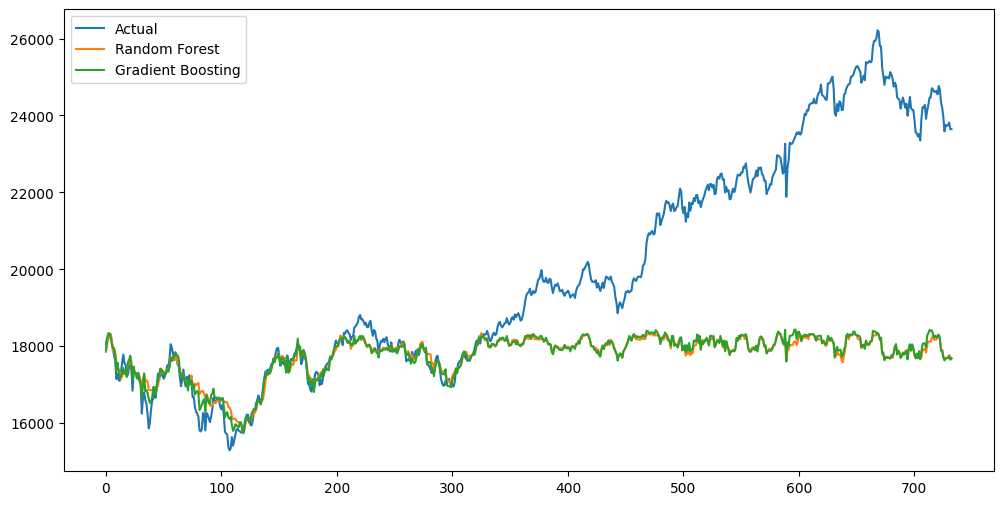

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual")
plt.plot(pred_rf, label="Random Forest")
plt.plot(pred_gb, label="Gradient Boosting")
plt.legend()
plt.show()


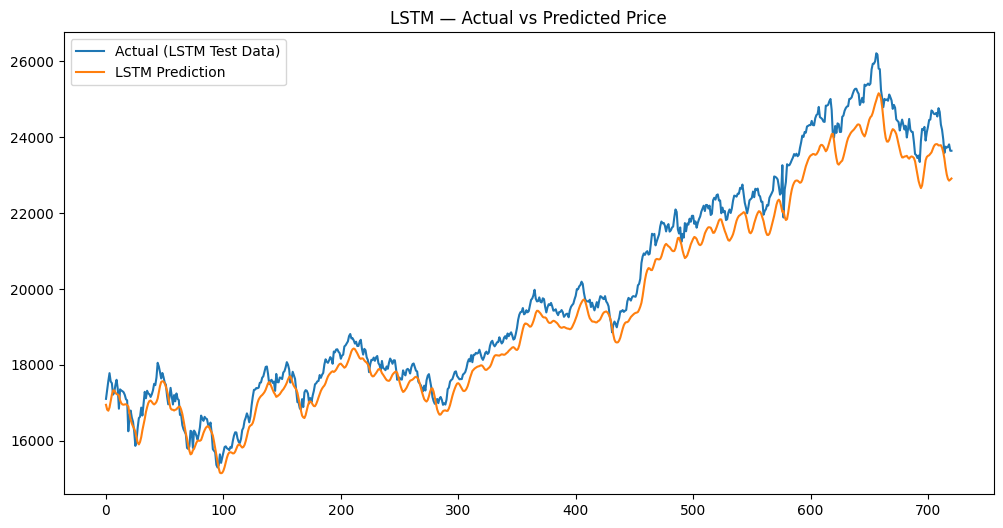

In [19]:
plt.figure(figsize=(12,6))
plt.plot(real_lstm, label="Actual (LSTM Test Data)")
plt.plot(pred_lstm, label="LSTM Prediction")
plt.title("LSTM — Actual vs Predicted Price")
plt.legend()
plt.show()


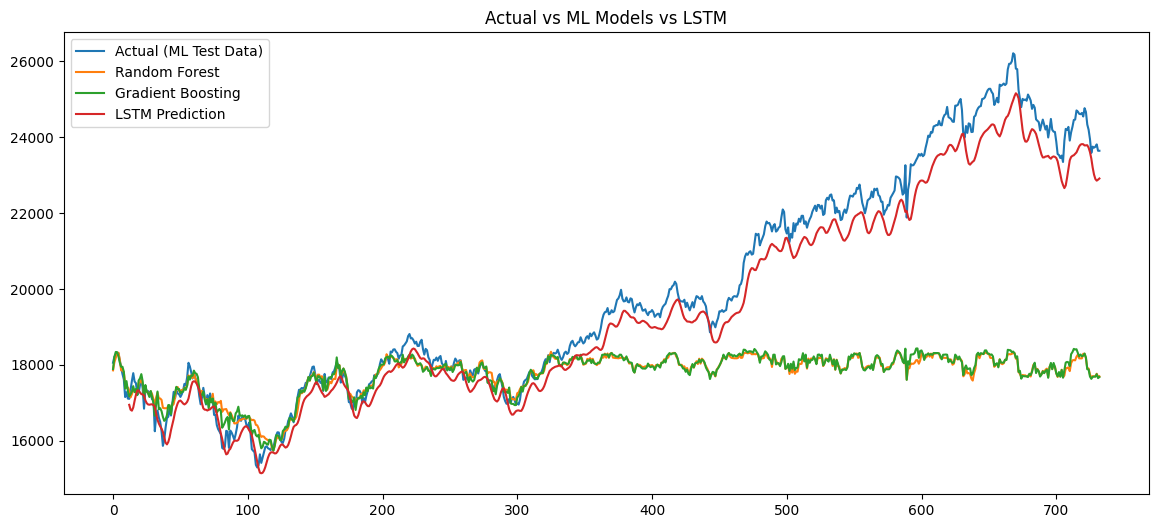

In [20]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual (ML Test Data)")
plt.plot(pred_rf, label="Random Forest")
plt.plot(pred_gb, label="Gradient Boosting")

# LSTM test values must match ML test indexes
plt.plot(range(len(y_test)-len(pred_lstm), len(y_test)), pred_lstm, 
         label="LSTM Prediction")

plt.title("Actual vs ML Models vs LSTM")
plt.legend()
plt.show()
